## Plotting temperature envelopes

Here we show how to plot temperature envelopes. For this we use the `PT_envelopes.py` package which can be found in the `petitRADTRANS` source folder, in the sub folder `retrieval_examples/analysis`.

We start by loading the relevant packages:

In [1]:
import numpy as np
import pylab as plt
import pickle

from PT_envelopes import return_PT_envelopes

Next we read the pickle files of the retrieval, in this case as produced for the transmission retrieval example (see the source in `retrieval_examples/transmission_case`, and the documentation thereof [here](ret_transmission_master.html).

In [3]:
# Paths to pickle files
samples_path = 'chain_pos.pickle'

# Load samples
f = open(samples_path,'rb')
pos = pickle.load(f)
prob = pickle.load(f)
state = pickle.load(f)
samples = pickle.load(f)
f.close()

Next we specify some parameters: the number of samples to be used (smaller than the total number of samples, to cut off the burn-in phase), the name of the pickle file to save the envelope arrays, and, optionally, the parameters used to generate the synthetic observations. The latter will be missing for a real observation.

In [4]:
envelope_file = 'T_enve.pickle'
N_samples = 700000
true_values = np.genfromtxt('input_params.dat')

Next we get the P-T envelopes. If `read = True`, they will be read from the path specified in `envelope_file`. If it is `read = False`, they will be calculated from the sample array and saved to the path specified in `envelope_file`.

In [5]:
envelopes = return_PT_envelopes(samples, \
                    envelope_file, \
                    N_samples = N_samples, \
                    read = False, \
                    true_values = true_values)

The function `return_PT_envelopes()` returns a list with the following content:

`[[p, temp_input], [5, 15, 25, 35], [temp_left_1, temp_left_2, temp_left_3, temp_left_4],`

`[temp_right_1, temp_right_2, temp_right_3, temp_right_4]]`

Where `p` is the pressure array, `temp_input` will only not be `None` if `true_values` were given to the `return_PT_envelopes()` function, this is the input P-T profile. The `[5, 15, 25, 35]` specifies how far the left envelope boundaries are from the zeroth percentile. This is identical to how far the right envelope boundaries are from the 100th percentile.

Finally, let's plot the envelope and input P-T profile:

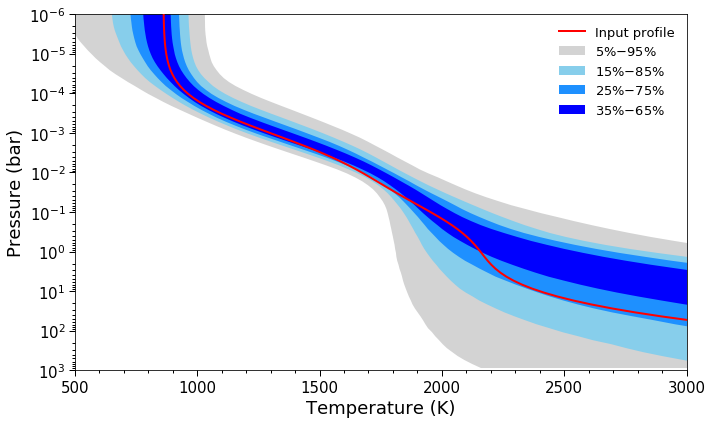

In [8]:
plt.gcf().set_size_inches(10., 6.)
plt.gca().minorticks_on()
plt.gca().tick_params(axis='y',which='major',length=6.,width=1)
plt.gca().tick_params(axis='y',which='minor',length=3.,width=1)
plt.gca().tick_params(axis='x',which='major',length=6.,width=1)
plt.gca().tick_params(axis='x',which='minor',length=3.,width=1)

plt.fill_betweenx(envelopes[0][0], envelopes[2][0], envelopes[3][0], \
                      facecolor='lightgrey', label='5%$-$95%', zorder=-10)
plt.fill_betweenx(envelopes[0][0], envelopes[2][1], envelopes[3][1], \
                      facecolor='skyblue', label='15%$-$85%', zorder=-10)
plt.fill_betweenx(envelopes[0][0], envelopes[2][2], envelopes[3][2], \
                      facecolor='dodgerblue', label='25%$-$75%', zorder=-10)
plt.fill_betweenx(envelopes[0][0], envelopes[2][3], envelopes[3][3], \
                      facecolor='b', label='35%$-$65%', zorder=-10)

plt.plot(envelopes[0][1], envelopes[0][0], color='red', linewidth=2, \
             zorder=10, label='Input profile')

plt.xlabel('Temperature (K)', fontsize = 18, color = 'k')
plt.ylabel('Pressure (bar)', fontsize = 18, color = 'k')
plt.ylim([1e3,1e-6])
plt.xlim([500.,3000.])
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.yscale('log')
plt.legend(loc='best',frameon=False, fontsize=13)
plt.tight_layout()
plt.show()
plt.clf()